In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Define transformations for data preprocessing
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split train_dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)


Files already downloaded and verified
Files already downloaded and verified


In [8]:
import torchvision
import torchvision.transforms as transforms

# Define ResNet-18 architecture
resnet18 = torchvision.models.resnet18(pretrained=False, num_classes=10)

# Define VGG-16 architecture
vgg16 = torchvision.models.vgg16(pretrained=False, num_classes=10)

# Define LeNet-5 architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet5 = LeNet5()

In [9]:
def train(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validate the model
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return train_losses, val_losses, train_accs, val_accs

def test(model, criterion, test_loader):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_loader)
    test_acc = 100. * correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

    return test_loss, test_acc


In [10]:
# Define loss function and optimizer
import torch.nn.functional as F
criterion = nn.CrossEntropyLoss()
optimizer_resnet18 = optim.Adam(resnet18.parameters(), lr=0.001)
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=0.001)
optimizer_lenet5 = optim.Adam(lenet5.parameters(), lr=0.001)

# Train ResNet-18
resnet18_train_losses, resnet18_val_losses, resnet18_train_accs, resnet18_val_accs = train(resnet18, criterion, optimizer_resnet18, train_loader, val_loader, num_epochs=10)

# Train VGG-16
vgg16_train_losses, vgg16_val_losses, vgg16_train_accs, vgg16_val_accs = train(vgg16, criterion, optimizer_vgg16, train_loader, val_loader, num_epochs=10)

# Train LeNet-5
lenet5_train_losses, lenet5_val_losses, lenet5_train_accs, lenet5_val_accs = train(lenet5, criterion, optimizer_lenet5, train_loader, val_loader, num_epochs=10)

# Test models
print("ResNet-18 Test Results:")
resnet18_test_loss, resnet18_test_acc = test(resnet18, criterion, test_loader)

print("VGG-16 Test Results:")
vgg16_test_loss, vgg16_test_acc = test(vgg16, criterion, test_loader)

print("LeNet-5 Test Results:")
lenet5_test_loss, lenet5_test_acc = test(lenet5, criterion, test_loader)


Epoch [1/10], Train Loss: 1.6028, Train Acc: 41.26%, Val Loss: 1.3796, Val Acc: 50.06%
Epoch [2/10], Train Loss: 1.2566, Train Acc: 54.81%, Val Loss: 1.1893, Val Acc: 57.08%
Epoch [3/10], Train Loss: 1.0931, Train Acc: 61.20%, Val Loss: 1.0256, Val Acc: 63.17%
Epoch [4/10], Train Loss: 0.9941, Train Acc: 64.92%, Val Loss: 0.9502, Val Acc: 65.81%
Epoch [5/10], Train Loss: 0.9088, Train Acc: 67.89%, Val Loss: 0.9700, Val Acc: 66.17%
Epoch [6/10], Train Loss: 0.8507, Train Acc: 69.97%, Val Loss: 0.8914, Val Acc: 68.48%
Epoch [7/10], Train Loss: 0.8014, Train Acc: 71.89%, Val Loss: 0.8566, Val Acc: 70.46%
Epoch [8/10], Train Loss: 0.7548, Train Acc: 73.70%, Val Loss: 0.8760, Val Acc: 69.44%
Epoch [9/10], Train Loss: 0.7143, Train Acc: 74.87%, Val Loss: 0.7707, Val Acc: 73.05%
Epoch [10/10], Train Loss: 0.6839, Train Acc: 75.93%, Val Loss: 0.7246, Val Acc: 74.95%
Epoch [1/10], Train Loss: 2.4272, Train Acc: 9.91%, Val Loss: 2.3031, Val Acc: 9.57%
Epoch [2/10], Train Loss: 2.3027, Train Acc:

Epoch [1/10], Train Loss: 0.6875, Train Acc: 76.00%, Val Loss: 0.7296, Val Acc: 75.13%
Epoch [2/10], Train Loss: 0.6462, Train Acc: 77.33%, Val Loss: 0.7655, Val Acc: 73.48%
Epoch [3/10], Train Loss: 0.6182, Train Acc: 78.28%, Val Loss: 0.6556, Val Acc: 77.32%
Epoch [4/10], Train Loss: 0.5935, Train Acc: 79.37%, Val Loss: 0.6601, Val Acc: 77.47%
Epoch [5/10], Train Loss: 0.5722, Train Acc: 80.03%, Val Loss: 0.6739, Val Acc: 76.31%
Epoch [6/10], Train Loss: 0.5502, Train Acc: 80.66%, Val Loss: 0.6070, Val Acc: 78.94%
Epoch [7/10], Train Loss: 0.5305, Train Acc: 81.45%, Val Loss: 0.6828, Val Acc: 76.03%
Epoch [8/10], Train Loss: 0.5154, Train Acc: 82.11%, Val Loss: 0.6402, Val Acc: 78.09%
Epoch [9/10], Train Loss: 0.5020, Train Acc: 82.44%, Val Loss: 0.6650, Val Acc: 77.28%
Epoch [10/10], Train Loss: 0.4872, Train Acc: 82.91%, Val Loss: 0.5900, Val Acc: 79.34%
Epoch [1/10], Train Loss: 2.3027, Train Acc: 9.92%, Val Loss: 2.3029, Val Acc: 9.60%
Epoch [2/10], Train Loss: 2.3027, Train Acc:

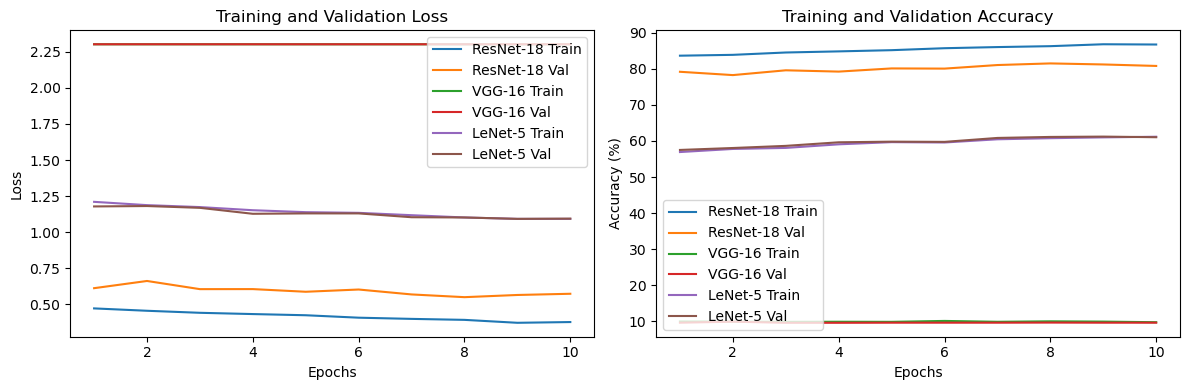

In [11]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define optimizers for each model (assuming resnet18, vgg16, and lenet5 models are defined)
optimizer_resnet18 = optim.Adam(resnet18.parameters(), lr=0.001)
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=0.001)
optimizer_lenet5 = optim.Adam(lenet5.parameters(), lr=0.001)

# Train ResNet-18
resnet18_train_losses, resnet18_val_losses, resnet18_train_accs, resnet18_val_accs = train(
    resnet18, criterion, optimizer_resnet18, train_loader, val_loader, num_epochs=10
)

# Train VGG-16
vgg16_train_losses, vgg16_val_losses, vgg16_train_accs, vgg16_val_accs = train(
    vgg16, criterion, optimizer_vgg16, train_loader, val_loader, num_epochs=10
)

# Train LeNet-5
lenet5_train_losses, lenet5_val_losses, lenet5_train_accs, lenet5_val_accs = train(
    lenet5, criterion, optimizer_lenet5, train_loader, val_loader, num_epochs=10
)

# Train ResNet-18
resnet18_train_losses, resnet18_val_losses, resnet18_train_accs, resnet18_val_accs = train(resnet18, criterion, optimizer_resnet18, train_loader, val_loader, num_epochs=10)
epochs = range(1, 11)  # Assuming 10 epochs

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, resnet18_train_losses, label='ResNet-18 Train')
plt.plot(epochs, resnet18_val_losses, label='ResNet-18 Val')
plt.plot(epochs, vgg16_train_losses, label='VGG-16 Train')
plt.plot(epochs, vgg16_val_losses, label='VGG-16 Val')
plt.plot(epochs, lenet5_train_losses, label='LeNet-5 Train')
plt.plot(epochs, lenet5_val_losses, label='LeNet-5 Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, resnet18_train_accs, label='ResNet-18 Train')
plt.plot(epochs, resnet18_val_accs, label='ResNet-18 Val')
plt.plot(epochs, vgg16_train_accs, label='VGG-16 Train')
plt.plot(epochs, vgg16_val_accs, label='VGG-16 Val')
plt.plot(epochs, lenet5_train_accs, label='LeNet-5 Train')
plt.plot(epochs, lenet5_val_accs, label='LeNet-5 Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
